# Introduction, Model Evaluation and Improvement

__Import libraries__

In [28]:
# essential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

# datasets 
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit

# ML algorithms
from sklearn.linear_model import LogisticRegression

# supressing warnings
import warnings 
warnings.filterwarnings('ignore')

- We will focus on the supervised methods, regression and classification.
- For classification, score computes the fraction of correctly classified samples.

In [23]:
# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Test set score: 0.880


- We split our data because we are interested in measuring how well our model generalizes to new, previously unseen data.

---

## Cross-Validation

- Cross-Validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into training ans test set.
- Most commonly used k-fold cross validation, where k is a specified number.
- Process:
    - When performing 5-fold cross validation the data is first partitioned into five parts of (approximately) equal size, called folds.
    - the data is first partitioned into five parts of (approximately) equal size, called folds. Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model isbuilt using the data in folds 2–5, and then the accuracy is evaluated on fold 1.
    - Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3,4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets.

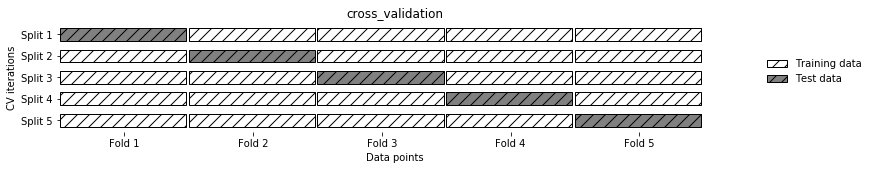

In [3]:
mglearn.plots.plot_cross_validation()

### Cross-Validation in scikit-learn

- Cross-Validation is implemented in scikit-learn using cross-val-score function from the model_selection module.

In [20]:
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-Validation score: {}".format(scores))

Cross-Validation score: [0.96078431 0.92156863 0.95833333]


In [21]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-Validation score: {}".format(scores))

Cross-Validation score: [1.         0.96666667 0.93333333 0.9        1.        ]


In [6]:
print("Average cross validation score: {:.3f}".format(scores.mean()))

Average cross validation score: 0.960


Looking at all five scores by the five-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 90% accuracy. This could imply that the model is very dependent on the particular folds used for training, but it could also just be a consequence of the small size of the dataset.

### Benefits of Cross-Validation

- When using cross-validation, each example will be in the test set exactly one: each example is in one of the folds, and each fold is the test set score.
- Therefore, the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high.
- Another benefit, we use our data more effectively. More data will usually result in more accurate models.
- Disadvantage: increased computational cost, cross-validation will be roughly k times slower than doing a single split of the data.
- We are not using cross-validation to build a model, but we only evaluate how well a given algorithm will generalize when trained on a specific dataset.

### Stratified k-Fold Cross-Validation and Other Strategies

It's not a good idea to use cross validation to this kind of data:

In [7]:
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


As the simple k-fold strategy fails here, scikit-learn does not use it for classification, but rather uses stratified k-fold cross-validation. In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

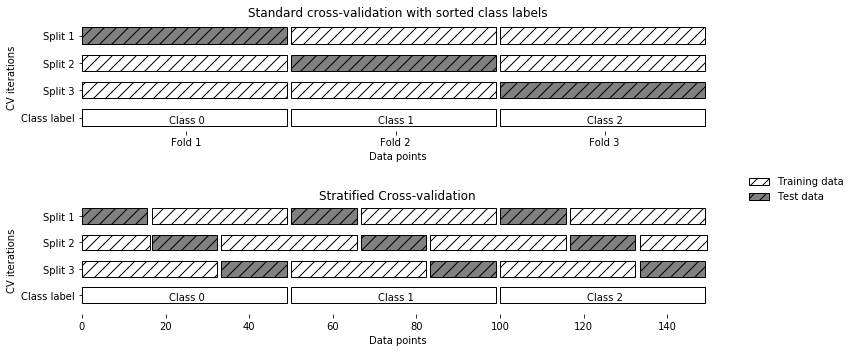

In [8]:
mglearn.plots.plot_stratified_cross_validation()

For example, if 90% of your samples belong to class A and 10% of your samples
belong to class B, then stratified cross-validation ensures that in each fold, 90% of
samples belong to class A and 10% of samples belong to class B.

#### More control over cross-validation

- scikit-learn allows for much finer control over splitting data by providing cross-validation splitter as the cv parameter.

In [9]:
kfold = KFold(n_splits=5)

In [24]:
print("Cross-valisdation scores: {}".format(cross_val_score(logreg, iris.data, iris.target,
                                                           cv=kfold)))

Cross-valisdation scores: [0.9  0.96 0.96]


In [25]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, 
                                                           cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


- If we shuffle the data, we also need to fix the random_state to get a reproducible shuffling.

In [26]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, 
                                                           cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


#### Leave-one out cross validation

- Leave one datapoints out as test set, and the rest become training set.
- Very time consuming, particularly for large datasets, but sometimes provide better estimates on small datasets.

In [19]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


#### Shuffle-split cross-validation

- Each split samples train_size many points for the training set and test_size many (disjoint) point for the test set. This splitting is repeated n_splits times.
- We can use integers for train_size and test_size to use absolute sizes for these sets, or floating-point numbers to use fractions of the whole dataset

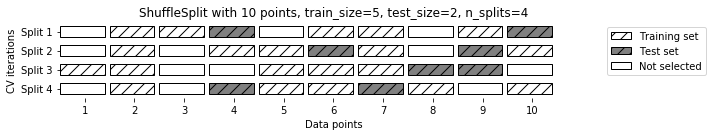

In [27]:
mglearn.plots.plot_shuffle_split()

In [29]:
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10) # 10 times of splitting
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.88       0.93333333 0.97333333 0.94666667 0.96       0.84
 0.90666667 0.92       0.96       0.97333333]


In [30]:
print("Average cross-validation score: {:.3f}".format(scores.mean()))

Average cross-validation score: 0.929


- Shuffle-split cross-validation allows for control over the number of iterations independently of the training and test sizes, which can sometimes be helpful.
- It also allows for using only part of the data in each iteration, by providing train_size and test_size settings that don’t add up to one. Subsampling the data in this way can be useful for experimenting with large datasets.
- There is also a stratified variant of ShuffleSplit, aptly named StratifiedShuffleS plit, which can provide more reliable results for classification tasks.

#### Cross-validation with groups

- Very common setting for cross-validation is when there are groups in the data that are highly related.
- To accurately evaluate the generalization to new faces, we must therefore ensure that the training and test sets contain images of different people.
- To achieve this, we can use GroupKFold, which takes an array of groups as argument that we can use to indicate which person is in the image. The groups array here indicates groups in the data that should not be split when creating the training and test sets, and should not be confused with the class label.

In [31]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.8        0.66666667]


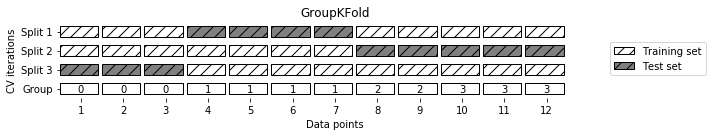

In [32]:
mglearn.plots.plot_group_kfold()

---

# IMPORTANT POINTS

- train_test_split:
    - Parameters: X, y, random_state
    - Return: X_train, X_test, y_train, y_test
    - Split the data into training set and test set. We use training set to build the model and evaluate the performance using test set.
    - Downside: Not effecient when using the data. Because part of training set we did not use for validation and part of test set we did not use for training set.
- Cross-validation:
    - Main method: 
        - cross_val_score, is not a model. But a method to compute the performance of a model. 
            - return: array of score.
            - parameters: model, feature matrix, target vector and cv.
            - Works by split the data into n folds, then evaluate it.
    - Objects for cv parameter:
        - Stratified cross-validation: Split the data properly, necessary if the target vector is arranged in groups. Default for classification problem.
        - Standard cross-validation: Split the data more simply. Will give us bad result when used for arranged target vector. Default for regression problem.
        - KFold(n_splits, shuffle, random_state), return KFold object.
        - LeaveOneOut(): works by choosing one data point as test set and the rest as training set. Computationally expensive.
        - ShuffleSplit(train_size, test_size, n_splits):
            - Split the data n_splits times, in each split the data get partitioned to train_size training set and test_size test set.
        - StratifiedShuffleSplit: Good for classification
        - GroupKFold: we use this if the data point groups together, if we seperate them, probably our calculation of performance will be not so good.